In [1]:
from IPython.display import Image, display
from PIL import Image as pilimg
%matplotlib inline
data_path = '../_datasets/'
image_path = '../images/'

In [2]:
import numpy as np
import pandas as pd #To read the dataset
import matplotlib.pyplot as plt #Plotting
import time
from IPython import display
%matplotlib inline

In [3]:
dataset = pd.read_csv('ADRvsRating.csv')
data = dataset.as_matrix()

numInstances = data.shape[0]

dataset.head()

c:\users\windows\appdata\local\conda\conda\envs\mlcode100\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


,ADR,Rating
0,85.0,117.0
1,83.5,110.0
2,78.2,102.0
3,68.1,97.0
4,66.3,86.0


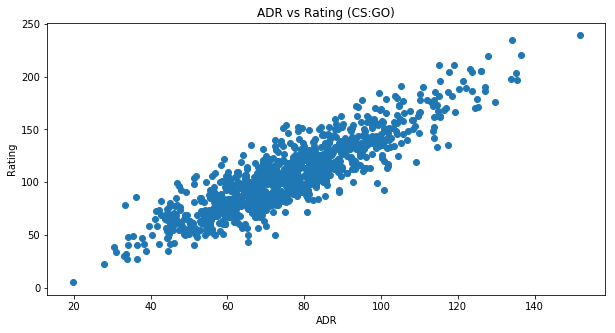

In [4]:
plt.figure(figsize=(10,5))
plt.title('ADR vs Rating (CS:GO)')
plt.scatter(x=data[:,0],y=data[:,1])
plt.xlabel('ADR')
plt.ylabel('Rating')
plt.show()

In [5]:
def SSE_new(m,b,data):
    return np.array([(data[i,1]-(m*data[i,0]+b))**2 for i in range(numInstances)]).sum()

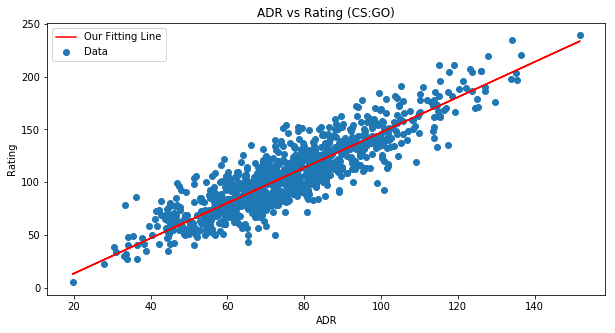

In [6]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('ADR vs Rating (CS:GO)')
ax.scatter(x=data[:,0],y=data[:,1],label='Data')
m=1.67
b=-20
plt.plot(data[:,0], m*data[:,0] + b,color='red',label='Our Fitting Line')
ax.set_xlabel('ADR')
ax.set_ylabel('Rating')
ax.legend(loc='best')

plt.show()

In [7]:
%time
m=1.67
b=-20

SSE_new(m,b,data)

Wall time: 0 ns


255286.877289

# Minimizing our error - Gradient Descent
Hypothesis -->h0(x) = b + mx 

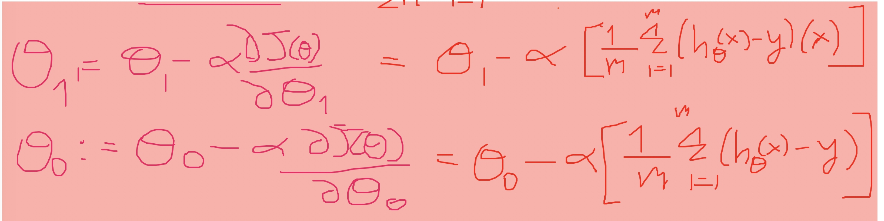

Repeat until covergence

In [8]:
def my_gd_step(m,b,l_rate,data):
    
    N = numInstances
    m_gd = 0
    b_gd = 0
    
    for i in range(N):

        #Get point (x,y)
        x = data[i,0]
        y = data[i,1]

        # 'm'
        dm = -((1/N) * x * (y - (m*x + b)))
        
        # 'b'
        db = - ((1/N) * (y - (m*x + b)))
    
       
        m_gd = m_gd + dm
        b_gd = b_gd + db
    
    #Set the new 'better' 'm' and 'b'
    better_m = m - l_rate*m_gd
    better_b = b - l_rate*b_gd
    
    
    return better_m,better_b

In [9]:
def listcompeh_gd_step(m,b,l_rate,data):
    N = numInstances
    
   
    dm = (l_rate/N) * np.array([((b+m*data[i,0])-data[i,1])*data[i,0] for i in range(N)]).sum()
    db = (l_rate/N)* np.array([(b+m*data[i,0])-data[i,1] for i in range(N)]).sum()
    
    m_better = m-dm
    b_better = b-db

    return m_better,b_better

initial drawing line as: y = 2.00x + 3.00 - initial SSE is : 2644260.84
At interval 1 learning rate 0.0001  - Line: y = 1.62x + 3.00 - Error: 631071.30 - Chaged : 631070.2970 
At interval 2 learning rate 0.0001  - Line: y = 1.47x + 2.99 - Error: 327917.30 - Chaged : 0.4804 
At interval 3 learning rate 0.0001  - Line: y = 1.41x + 2.99 - Error: 282267.00 - Chaged : 0.1392 
At interval 4 learning rate 0.0001  - Line: y = 1.39x + 2.99 - Error: 275392.60 - Chaged : 0.0244 

Best  line: y = 1.38x + 2.99 - Error: 274357.22


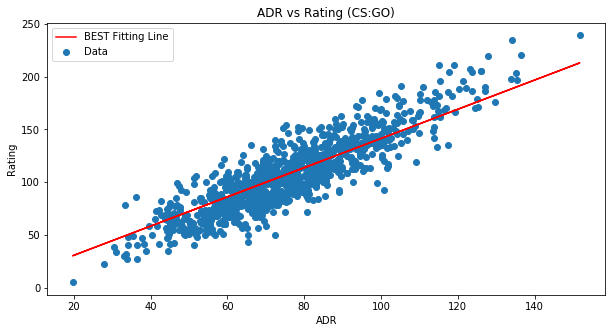

In [13]:
m = 2
b = 3
l_rate = 0.0001
sse = SSE_new(m,b,data)
# set initial value of previus sse
prev_sse = 1.0 
# set initial condition value of sse to do early stopping the loop of gradient descent step when sse chang less than this value
percent_changed = 0.01 

print('initial drawing line as: y = %.2fx + %.2f - initial SSE is : %.2f' %(m,b,sse))

for i in range(20):
    m,b = listcompeh_gd_step(m,b,l_rate,data)
    sse = SSE_new(m,b,data)
    sse_changed = np.abs((sse - prev_sse) / prev_sse)
    if sse_changed < percent_changed:
        break
    else:
        print('At interval %d learning rate %.4f  - Line: y = %.2fx + %.2f - Error: %.2f - Chaged : %.4f ' %(i+1,l_rate,m,b,sse,sse_changed))
    prev_sse = sse

print('\nBest  line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))

m=m
b=b
x = data[:,0]
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('ADR vs Rating (CS:GO)')
ax.scatter(x=x,y=data[:,1],label='Data')
plt.plot(x, m*x + b,color='red',label='BEST Fitting Line')
ax.set_xlabel('ADR')
ax.set_ylabel('Rating')
ax.legend(loc='best')

plt.show()